# AM1054 Continuous Assessment 3

In [2]:
# execute this cell before you start the assignment
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from ipywidgets import interact

sym.init_printing(use_latex="mathjax")
x, y, z, t = sym.symbols('x y z t')

Due Wednesday 9 December 2020, 10am. No late assignments will be accepted. Strictly individual (no team) solutions are required. 

Upload your solution file `CA3.ipynb` to Canvas. 

Write `std_nr='11XXXXXXX'` (where 11XXXXXXX is your student number) into the next cell:

In [3]:
std_nr = 120309116

In [4]:
assert(int(std_nr))

# 1. Symbolic computations

Use `Python` and the `sympy` library to answer questions below. 
Consider the function 
\begin{equation}
f(x) = x^3 e^{-x^4}
\end{equation}



a) Use Python to calculate $\frac{d^3}{dx^3}f(x)$ symbolically and assign the result to the Python variable `fprime`. (1 mark)

In [5]:
fx = (x**3) * sym.exp(-x**4)
fprime = sym.diff(fx,x,3)

In [6]:
assert type(fprime.subs({x:0})) == sym.core.numbers.Integer

b) Calculate $F(z) = \int_{-\infty}^z f(x) dx$ and assign the result to the Python variable `fintegral`. (1 mark)

In [7]:
fintegral = sym.integrate(fx, (x,-sym.oo, z))

In [8]:
assert type(fintegral.subs({z:0})) == sym.core.numbers.Rational

c) Plot a figure with two subplots, which share the x-axis. In the upper graph plot the functions $f(x)$ and $F(z)=\int_{-\infty}^z f(x)dx$. In the lower graph plot $\frac{d^3}{dx^3}f(x)$. Choose $x,z\in[-3,3]$. Add legend boxes with appropriate labels. (2 marks)

In [9]:
fofx = sym.lambdify(x,fx)
fprimex = sym.lambdify(x,fprime)
fintegralx = sym.lambdify(z,fintegral)

fxaxis = np.linspace(-3,3,100)


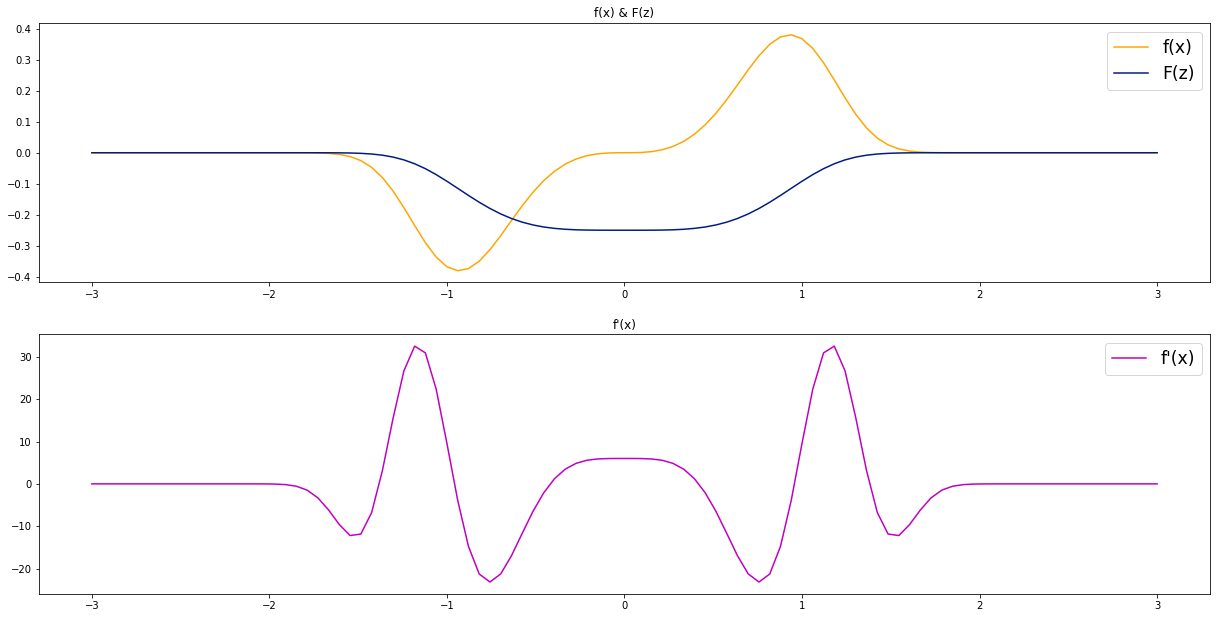

In [10]:
with plt.style.context('seaborn-dark-palette'):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(21,10.5))

    ax1.set_title('f(x) & F(z)')
    ax1.plot(fxaxis, fofx(fxaxis), label='f(x)', color='orange')
    ax1.plot(fxaxis, fintegralx(fxaxis), label='F(z)')
    ax1.legend(fontsize='xx-large')

    ax2.set_title("f'(x)")
    ax2.plot(fxaxis, fprimex(fxaxis), label="f'(x)", color='m')
    ax2.legend(fontsize='xx-large')

    plt.show()

d) Create a slider which takes on integer values 
\begin{equation}
n\in \{ -1, 0, 1, \ldots 10\}.
\end{equation}
Make a graph which depends on the position of the slider in the following way:
- If $n>0$ plot $\frac{d^n}{dx^n}f(x)$.  
- If $n=0$ plot $f(x)$. 
- If $n=-1$ plot $F(z)$. 

In each case, use $x,z \in [0,3]$. (2 marks)

In [11]:
fxaxis2 = np.linspace(0,3,100)

@interact(n=(-1,10))
def hopethisworks(n=0):
    if n == 0:
        plt.plot(fxaxis2, fofx(fxaxis2))
    elif n == -1:
        plt.plot(fxaxis2, fintegralx(fxaxis2))
    else:
        fprime2 = sym.diff(fx,x,n)
        fprimen = sym.lambdify(x,fprime2)
        plt.plot(fxaxis2, fprimen(fxaxis2))

interactive(children=(IntSlider(value=0, description='n', max=10, min=-1), Output()), _dom_classes=('widget-in…

# 2. Polynomial Equations

a) Consider the function 
\begin{equation}
f(x, y, z) = -x^3 + y x - z
\end{equation}
Use `sympy` to calculate 
\begin{equation} 
g(x, y, z) =  \frac{\partial f(x, y, z)}{\partial x}
\end{equation}
symbolically. Assign the result to the Python variable `g`. (1 mark)

In [12]:
f = -(x**3) + (y * x) - z
g = sym.diff(f, x)

b) Plot the functions $f(x, 3, 2)$ and $g(x, 3, 2)$ into the same plot for $y = 3$ and $z = 2.$  Choose the x-axis in the range from -2 to 2 and plot the x-axis using a dashed black line. (1 marks)



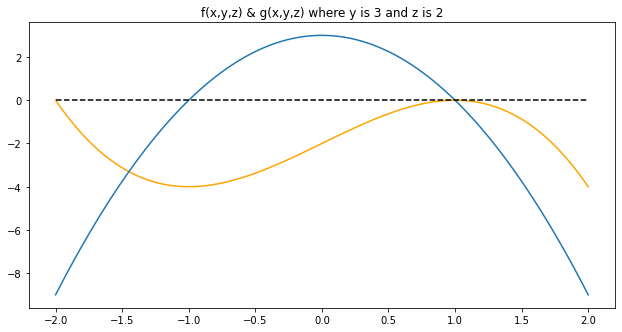

In [13]:
f = f.subs({y:3,z:2})
g = g.subs({y:3,z:2})
fx = sym.lambdify(x,f)
gx = sym.lambdify(x,g)


xaxis = np.linspace(-2,2,100)

fig, (ax1) = plt.subplots(1 , 1, figsize=((10.5,5.25)))
plt.style.use('seaborn-pastel')
ax1.set_title('f(x,y,z) & g(x,y,z) where y is 3 and z is 2')
ax1.plot(xaxis, fx(xaxis), color='orange')
ax1.plot(xaxis, gx(xaxis))
ax1.plot(xaxis,xaxis*0, '--', color = 'black')
plt.show()


c) Formally 
\begin{align}
f(x,y,z) &= 0\\
g(x,y,z) &= 0\\
\end{align}
are two equations in three real unknowns $x, y, z$.  For given $x$, there exist therefore functions $(y(x),z(x))$ such that   
\begin{align}
f(x,y(x),z(x)) &= 0\\
g(x,y(x),z(x)) &= 0\\
\end{align}
Use `sympy` to solve this set of equations for $y$ and $z$ as functions of $x$ and assign the Python variables `y_sol`, `z_sol` accordingly. (2 marks)

In [14]:
f=-(x**3) + (y * x) - z
g= -3 * (x**2) + y

y_solution = sym.solve(sym.Eq(g,0))
f = f.subs({y:y_solution[0][y]})

y_sol=y_solution[0][y]
z_sol = sym.solve(sym.Eq(f,0))[0][z]

d) Plot the solutions $y(x)$ and $z(x)$ for $x\in [-3,3]$ in the  $(y, z)$ plane. (2 marks)

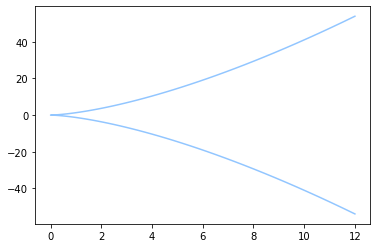

In [15]:
yaxis = np.linspace(-3,3,100)
yx = sym.lambdify(x,y_sol)
zx = sym.lambdify(x,z_sol)

#plt.plot(xaxis), yx(yaxis)) I dont think this is what is wanted for both.
plt.plot(yx(xaxis), zx(yaxis))
plt.show()

# 3. Stirling's Approximation
Stirling's formula proposes that the factorial of a natural number `n` can be approximated as 
\begin{equation}
  n! \approx \sqrt{2\pi n} \left(\frac{n}{e}\right)^n
\end{equation}

a) Write a Python function `S(n)` which returns the right hand side of this approximation as a floating point number.  (1 mark)

In [16]:
def S(n):
    return np.sqrt(2 * np.pi * n ) * (n / np.exp(1))**n

In [17]:
assert type(S(3)) == np.float64 or type(S(3)) == float

b) It is known that for large `n` the relative error of Stirling's approximation converges to zero.  
Calculate the relative error  $\epsilon_n$ for $n = 5, 10, 20, 40, 100$ and plot $\log(n)$ versus $\log \epsilon_n$ as black dots. (1 mark)

In [18]:
numbers = [5,10,20,40,100]
error = []
logn = []

for num in numbers:
    error.append(np.log(np.math.factorial(num) - np.log(S(num))))
    logn.append(sym.log(num))

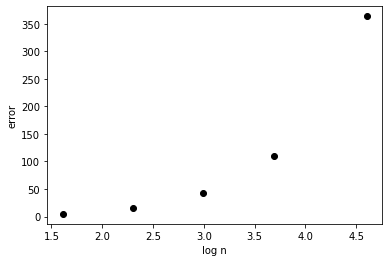

In [19]:
plt.scatter(logn, error, color='black')
plt.xlabel('log n')
plt.ylabel('error')
plt.show()

c) Calculate the relative error for $n=200$.  What do you observe?  How do you explain your observations? (2 marks)

In [20]:
re = np.log(np.math.factorial(200)-np.log(S(200)))

<ipython-input-16-14b89f995f15>:2: RuntimeWarning: overflow encountered in double_scalars
  return np.sqrt(2 * np.pi * n ) * (n / np.exp(1))**n


OverflowError: int too large to convert to float

The result becomes too large and python is unable to convert it from an integer value into a float.I came to this conclusion based on the logn,error graph rising exponentially and the overflow error when trying to run n=200.


# 4 Exponential function

The exponential function can be defined as 
\begin{equation}
e^a = \lim_{n \to \infty} \left(1 +\frac{a}{n}\right)^n
\end{equation}

a) Define a Python function `Ep(a,i)` which returns \begin{equation}
\left(1 +\frac{a}{2^i}\right)^{2^i}
\end{equation}
as a floating point number. (1 mark)

In [21]:
def Ep(a,i):
    return (1+(a/2**i))**(2**i)

In [22]:
assert type(Ep(2,4)) == np.float64 or type(Ep(2,4)) == float

b) Calculate the value of `i` for which `Ep(17,i)` yields the best approximation of $e^{17}$.  
Assign this `i` value to the Python variable `best_i`. (1 mark)

In [44]:
import math
approx =[]

for i in range(100):
    approx.append(sym.simplify(abs(Ep(17,i)-np.exp(17))))
    
for i in range(len(approx)-1):
    if approx[i] < approx[i+1]:
        best_i = i


In [42]:
assert type(best_i) == int

c) Explain why for large `i`, the function `Ep(17,i)` does not approximate $e^{17}$ well. (2 marks)

##### Answer:
Floating point numbers get less precise the further you get from 0. This is because $ 2^{64} $ floating point numbers are not evenly distributed along the number line; the numbers are condensed closer to 0. They are much more frequently found lying close to 0 on the number line. Just as very small numbers are likely to be rounded off, it is common that very large numbers have their nearest floating point number much further away than their actual value. Due to this, the difference between the actual, precise number and the inexact floating point representative is lost. Ergo, for large i, the function does not approximate $ e^{17} $ as well as it possibly could have.

# 5. Legendre Polynomials

The Legendre polynomials $P_n(x)$ can be recursively defined by the following rules:

\begin{align}
P_0(x) &= 1 \\
P_1(x) &= x \\
(k+1) P_{k+1}(x) &= (2k+1) x P_{k}(x) - k P_{k-1}(x)
\end{align}

(Do not use the Legendre functions from sympy or numpy in this question)

a) Write a python function `legendre(n)` which for $n>0$ returns a list of polynomials $P_0(x), \ldots, P_{n-1}(x)$ according to the rules above.  (2 marks)

In [36]:
def legendre(n):
    if n > 0:
        list = [1,x]
        k=1
        for i in range(n-2):
            a = ((2*k + 1) * x * list[-1] - (k * list[-2]))/(k+1)
            k+=1
            list.append(a)
        return list
legendre(3)

⎡         2    ⎤
⎢      3⋅x    1⎥
⎢1, x, ──── - ─⎥
⎣       2     2⎦

In [37]:
assert legendre(2)[1] == x
assert len(legendre(2)) == 2

b) Using your function `legendre()` from part (a) plot $P_1(x),\ldots, P_9(x)$ for $x\in[-1,1]$. (1 mark)

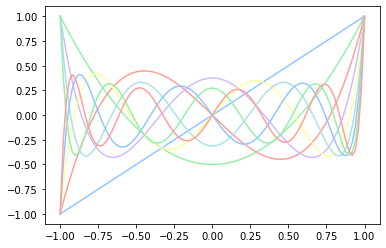

In [150]:
xaxis = np.linspace(-1,1,100)

for i in legendre(10)[1:]:
    leg = sym.lambdify(x, i)
    plt.plot(xaxis, leg(xaxis))


c) An alternive way of expressing the Legendre polynomials is through the formula

\begin{equation}
 P_{n}(x)={1 \over 2^{n}n!}{d^{n} \over dx^{n}}\left[(x^{2}-1)^{n}\right]
\end{equation}
Calculate $P_{10}$ with this method and assign to the variable `P10`.  Show that it yields the same result as your previous function `legendre(n)`. (2 marks)

In [183]:
n=10
p = (1 / ((2**n) * (sym.factorial(n))))
p2 = sym.diff(((x**2 - 1)**n),(x,n))
ppd2 = (p * p2.simplify())

leg = (legendre(11)[-1]).simplify()

leg == ppd2

True